Author: KuoChen Huang

Reference:
1. https://www.geeksforgeeks.org/how-to-read-multiple-text-files-from-folder-in-python/
2. https://datagy.io/python-remove-punctuation-from-string/ 
3. https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/
4. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
5. https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/ 
6. https://ithelp.ithome.com.tw/articles/10194633
7.https://www.projectpro.io/recipes/what-is-drop-out-rate-keras#:~:text=Dropout%20can%20be%20implemented%20by,the%20skill%20of%20the%20model. 
8. https://stackoverflow.com/questions/53838304/format-of-adding-hidden-layers-in-keras
9. https://vimsky.com/zh-tw/examples/detail/python-method-keras.layers.pooling.MaxPooling1D.html
10. https://keras.io/api/layers/convolution_layers/convolution1d/

## TextClassification

It is highly recommended that you complete this project using Keras and Python.

### (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.

In [1]:
import os
import pandas as pd
import numpy as np
import string
import operator
import statistics
import math

neg_path = "../data/neg"
pos_path = "../data/pos"

In [2]:
# Read text File
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return (f.read())

# iterate through all file
def read_all_file(path):
    text_file = dict()

    for file in os.listdir(path):
        # Check whether file is in text format or not
        if file.endswith(".txt"): 
            # get the index of the file
            # ex. cv676_22202.txt --> 676
            index = int(file.split('_')[0].split('cv')[1])
            file_path = path + '/' + file
            # call read text file function
            text_file[index] = read_text_file(file_path)
    return text_file

In [3]:
neg_file = read_all_file(neg_path)
pos_file = read_all_file(pos_path)

### (b) Data Exploration and Pre-processing

#### i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.

In [4]:
neg_data = pd.DataFrame.from_dict(neg_file, columns = ['content'] , orient = 'index')
neg_data = neg_data.sort_index()
neg_data['sentiment'] = -1

pos_data = pd.DataFrame.from_dict(pos_file, columns = ['content'] , orient = 'index')
pos_data = pos_data.sort_index()
pos_data['sentiment'] = 1

#### ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [5]:
def remove_punctuation(content):
    # remove punctuation
    new_content = content.translate(str.maketrans('', '', string.punctuation))
    # remove number
    new_content = ''.join([i for i in new_content if not i.isdigit()])
    # remove space/strip
    new_content = new_content.replace('\n', '')
    
    return new_content

In [6]:
for i in range(len(neg_data)):
    neg_data.loc[i, ['content']] = remove_punctuation(neg_data.iloc[i]['content'])
for i in range(len(pos_data)):
    pos_data.loc[i, ['content']] = remove_punctuation(pos_data.iloc[i]['content'])

#### iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

In [7]:
neg_training = neg_data.iloc[:700]
neg_testing = neg_data.iloc[700:]

pos_training = pos_data.iloc[:700]
pos_testing = pos_data.iloc[700:]

# combine data and create training set and testing set
training_data = pd.concat([neg_training, pos_training])
training_data = training_data.reset_index(drop=True)
testing_data = pd.concat([neg_testing, pos_testing])
testing_data = testing_data.reset_index(drop=True)

training_X = training_data["content"]
training_Y = training_data["sentiment"]
testing_X = testing_data["content"]
testing_Y = testing_data["sentiment"]

print("============== Training Dataset ==============")
print("Total data: " + str(len(training_data)))
print("Negative: " + str(len(neg_training)) + "/" + str(len(training_data)))
print("Positive: " + str(len(pos_training)) + "/" + str(len(training_data)))
print("============== Testing Dataset ==============")
print("Total data: " + str(len(testing_data)))
print("Negative: " + str(len(neg_testing)) + "/" + str(len(testing_data)))
print("Positive: " + str(len(pos_testing)) + "/" + str(len(testing_data)))

============== Training Dataset ==============
Total data: 1400
Negative: 700/1400
Positive: 700/1400
============== Testing Dataset ==============
Total data: 600
Negative: 300/600
Positive: 300/600


#### iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [8]:
word_list = dict()

# count the word in training data
for i in range(len(training_data)):
    split_list = training_data.iloc[i]['content'].split(" ")
    for word in split_list:
        if word not in word_list:
            word_list[word] = 1
        else:
            word_list[word] += 1
            
# count the word in testing data
for i in range(len(testing_data)):
    split_list = testing_data.iloc[i]['content'].split(" ")
    for word in split_list:
        if word not in word_list:
            word_list[word] = 1
        else:
            word_list[word] += 1

# remove useless key
del word_list['']

# sort the dict in descneding order
sorted_word_list = dict(sorted(word_list.items(), key = operator.itemgetter(1), reverse = True))

In [9]:
len(sorted_word_list)

46830

#### v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [10]:
review_len = dict()
for i in range(len(training_data)):
    split_list = training_data.iloc[i]['content'].split(" ")
    # remove the ""
    split_list = [value for value in split_list if value != ""]
    review_len[i] = len(split_list)

index_now = len(review_len)

for i in range(len(testing_data)):
    split_list = testing_data.iloc[i]['content'].split(" ")
    # remove the ""
    split_list = [value for value in split_list if value != ""]
    review_len[index_now + i] = len(split_list)

In [11]:
print("============== Average Revies Length ==============")
print(int(sum(review_len) / len(review_len)))
print("============== Standard Deviation of  Revies Length ==============")
print(int(statistics.pstdev(review_len)))

============== Average Revies Length ==============
999
============== Standard Deviation of  Revies Length ==============
577


#### vi. Plot the histogram of review lengths.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Histogram of Review Lengths')

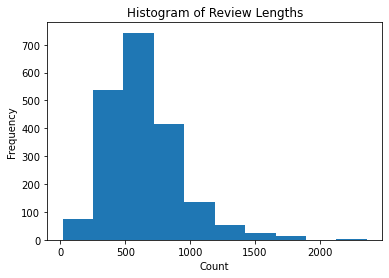

In [13]:
plt.hist(review_len.values(), bins = 10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Count')
plt.title('Histogram of Review Lengths')

#### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [14]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [15]:
all_text = ""
for i in range(len(training_data)):
    all_text = all_text + " " + training_data.iloc[i]['content']
for i in range(len(testing_data)):
    all_text = all_text + " " + testing_data.iloc[i]['content']

In [16]:
tokenization_list = list() # store all data
training_tokenization = list()
testing_tokenization = list()

t = Tokenizer()
# fit to thw whole(traini+test) dataset
t.fit_on_texts([all_text])

for i in range(len(training_data)):
    sequences = t.texts_to_sequences([training_data.iloc[i]['content']])
    #tokenization_list.append(t.word_index)
    tokenization_list.append(sequences[0])
    training_tokenization.append(sequences[0])

for i in range(len(testing_data)):
    sequences = t.texts_to_sequences([testing_data.iloc[i]['content']])
    tokenization_list.append(sequences[0])
    testing_tokenization.append(sequences[0])

In [17]:
len(tokenization_list)

2000

#### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [18]:
tokenization_review_len = dict()
for i in range(len(tokenization_list)):
    tokenization_review_len[i] = len(tokenization_list[i])

In [19]:
# get the threshold of the length
review_len_sorted = list({k: v for k, v in sorted(tokenization_review_len.items(), key = lambda item: item[1])}.values())
top70 = round(len(tokenization_review_len)*0.7)
filter_len = review_len_sorted[top70-1]
print("Review Length Threshold(70% of the reviews have a length below it): " + str(filter_len))

Review Length Threshold(70% of the reviews have a length below it): 737


In [20]:
def below_or_above(data, filter_len):
    blw = list()
    abv= list()
    for i in range(len(data)):
        if len(data[i]) <= filter_len:
            blw.append(data[i])
        else: 
            abv.append(data[i])
    return blw, abv

In [21]:
#below_threshold = list()
#above_threshold = list()
training_blw = list()
training_abv = list()
testing_blw = list()
testing_abv = list()

training_blw, training_abv = below_or_above(training_tokenization, filter_len)
testing_blw, testing_abv = below_or_above(testing_tokenization, filter_len)
  
print("There are " + str(len(training_blw) + len(testing_blw)) + " reviews with length below the threshold.")
print("There are " + str(len(training_abv) + len(testing_abv))  + " reviews with length above the threshold.")

There are 1404 reviews with length below the threshold.
There are 596 reviews with length above the threshold.


#### ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.

In [22]:
new_training_X = keras.preprocessing.sequence.pad_sequences(training_tokenization, maxlen = filter_len)
new_testing_X = keras.preprocessing.sequence.pad_sequences(testing_tokenization, maxlen = filter_len)

In [23]:
# check all reviews have the same value now
count_T = 0
count_F = 0
for data in new_training_X:
    if len(data)== filter_len:
        count_T += 1
    else:
        count_F += 1
for data in new_testing_X:
    if len(data)== filter_len:
        count_T += 1
    else:
        count_F += 1
print("After modifying, there are " + str(count_T) + "/" + str(len(new_training_X) + len(new_testing_X)) +  " reviews with length of " + str(filter_len) + " now.")

After modifying, there are 2000/2000 reviews with length of 737 now.


### (c) Word Embeddings

#### i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × 500 matrix.

In [35]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, Dense, Dropout, Conv1D, pooling, LSTM
from keras.layers.pooling import MaxPooling1D

In [25]:
# create a new datalist that contains only top500 words
def filter_top5000(data):
    top5000 = list()
    for i in range(len(data)):
        temp_list = list()
        for j in data[i]:
            if j>5000:
                temp_list.append(0)
            else:
                temp_list.append(j)
        top5000.append(temp_list)
    return top5000

In [26]:
top_training_X = filter_top5000(new_training_X)
top_testing_X = filter_top5000(new_testing_X)

In [27]:
# top words -> size of the vocabulary or the total number of unique words in a corpus
top_words = 5001
model1 = Sequential()
model1.add(Embedding(top_words, 32, input_length = filter_len))

#### ii. Flatten the matrix of each document to a vector.

In [28]:
model1.add(Flatten())
#model1.add(Dense(1, activation='sigmoid'))
#model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#print(model1.summary())

### (d) Multi-Layer Perceptron

#### i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [30]:
# ONE HOT ENCODING
new_training_Y = list()
new_testing_Y = list()

for i in training_Y:
    if i == 1:
        new_training_Y.append(1)
    else:
        new_training_Y.append(0)
        
for i in testing_Y:
    if i == 1:
        new_testing_Y.append(1)
    else:
        new_testing_Y.append(0)
        
new_training_Y = pd.Series(new_training_Y)
new_testing_Y = pd.Series(new_testing_Y)

In [31]:
# add three hidden layers
model1.add(Dense(units = 50, activation='relu')) 
model1.add(Dropout(0.2))
model1.add(Dense(units = 50, activation='relu')) 
model1.add(Dropout(0.5))
model1.add(Dense(units = 50, activation='relu')) 
model1.add(Dropout(0.5))
# add output layer
model1.add(Dense(1, activation='sigmoid'))

print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 737, 32)           160032    
_________________________________________________________________
flatten_1 (Flatten)          (None, 23584)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1179250   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [32]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

top_training_X = np.array(top_training_X)
top_testing_X = np.array(top_testing_X)
model1.fit(top_training_X, new_training_Y, validation_data=(top_testing_X, new_testing_Y), epochs=2, batch_size=10)

train_loss, train_accuracy = model1.evaluate(top_training_X, new_training_Y, verbose=0)
test_loss, test_accuracy = model1.evaluate(top_testing_X, new_testing_Y, verbose=0)
print("Training Accuracy: " + str(train_accuracy*100) + "%")
print("Testing Accuracy: " + str(test_accuracy*100) + "%")

/Users/Charlie/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1400 samples, validate on 600 samples
Epoch 1/2
1400/1400 [==============================] - 4s 3ms/step - loss: 0.6951 - acc: 0.5364 - val_loss: 0.6854 - val_acc: 0.5550
Epoch 2/2
1400/1400 [==============================] - 3s 2ms/step - loss: 0.6253 - acc: 0.6271 - val_loss: 0.6552 - val_acc: 0.6100
Training Accuracy: 92.14285612106323%
Testing Accuracy: 61.000001430511475%


### (e) One-Dimensional Convolutional Neural Network:

Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

#### i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.


In [33]:
model2 = Sequential()
model2.add(Embedding(top_words, 32, input_length = filter_len))
model2.add(Conv1D(filters = 32, kernel_size = 3))
model2.add(MaxPooling1D(pool_size = 2, strides = 2))
model2.add(Flatten())
# add three hidden layers
model2.add(Dense(units = 50, activation='relu')) 
model2.add(Dropout(0.2))
model2.add(Dense(units = 50, activation='relu')) 
model2.add(Dropout(0.5))
model2.add(Dense(units = 50, activation='relu')) 
model2.add(Dropout(0.5))
# add output layer
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 737, 32)           160032    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 735, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 367, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 11744)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                587250    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [34]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model2.fit(top_training_X, new_training_Y, validation_data=(top_testing_X, new_testing_Y), epochs=2, batch_size=10)

train_loss_2, train_accuracy_2 = model2.evaluate(top_training_X, new_training_Y, verbose=0)
test_loss_2, test_accuracy_2 = model2.evaluate(top_testing_X, new_testing_Y, verbose=0)
print("Training Accuracy: " + str(train_accuracy_2*100) + "%")
print("Testing Accuracy: " + str(test_accuracy_2*100) + "%")

/Users/Charlie/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1400 samples, validate on 600 samples
Epoch 1/2
1400/1400 [==============================] - 5s 3ms/step - loss: 0.6981 - acc: 0.5086 - val_loss: 0.6914 - val_acc: 0.5383
Epoch 2/2
1400/1400 [==============================] - 3s 2ms/step - loss: 0.6853 - acc: 0.5393 - val_loss: 0.6821 - val_acc: 0.5550
Training Accuracy: 72.85714149475098%
Testing Accuracy: 55.50000071525574%


### (f) Long Short-Term Memory Recurrent Neural Network:

The structure of the LSTM we are going to use is shown in the following figure.

#### i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [40]:
model3 = Sequential()
model3.add(Embedding(top_words, 32, input_length = filter_len))
model3.add(LSTM(units = 32))
model3.add(Dropout(0.2))
model3.add(Dense(units = 256, activation = 'relu')) 
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

print(model3.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 737, 32)           160032    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 177,057
Trainable params: 177,057
Non-trainable params: 0
________________________________________________

In [42]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model3.fit(top_training_X, new_training_Y, validation_data=(top_testing_X, new_testing_Y), epochs=15, batch_size=10)

train_loss_3, train_accuracy_3 = model3.evaluate(top_training_X, new_training_Y, verbose=0)
test_loss_3, test_accuracy_3 = model3.evaluate(top_testing_X, new_testing_Y, verbose=0)
print("Training Accuracy: " + str(train_accuracy_3*100) + "%")
print("Testing Accuracy: " + str(test_accuracy_3*100) + "%")

/Users/Charlie/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1400 samples, validate on 600 samples
Epoch 1/15
1400/1400 [==============================] - 154s 110ms/step - loss: 0.6928 - acc: 0.5136 - val_loss: 0.6875 - val_acc: 0.5650
Epoch 2/15
1400/1400 [==============================] - 144s 103ms/step - loss: 0.5373 - acc: 0.7543 - val_loss: 0.6058 - val_acc: 0.6833
Epoch 3/15
1400/1400 [==============================] - 180s 128ms/step - loss: 0.2461 - acc: 0.9000 - val_loss: 0.7375 - val_acc: 0.7100
Epoch 4/15
1400/1400 [==============================] - 184s 132ms/step - loss: 0.1076 - acc: 0.9579 - val_loss: 0.8555 - val_acc: 0.7467
Epoch 5/15
1400/1400 [==============================] - 144s 103ms/step - loss: 0.0539 - acc: 0.9807 - val_loss: 1.0412 - val_acc: 0.7150
Epoch 6/15
1400/1400 [==============================] - 159s 114ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.2771 - val_acc: 0.7267
Epoch 7/15
1400/1400 [==============================] - 150s 107ms/step - loss: 9.8602e-04 - acc: 1.0000 - val_loss: 1.4549 -